<a href="https://colab.research.google.com/github/Shashank-Holla/TSAI-EVA4/blob/master/Session13_yolov3/yolov3_pytorch_S13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup of yolov3

Clone TSAI's yolov3 repo.

In [0]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [0]:
cd '/gdrive/My Drive/Colab Notebooks/SchoolOfAI/session13_yolo_analytics'

/gdrive/My Drive/Colab Notebooks/SchoolOfAI/session13_yolo_analytics


In [0]:
!ls

YoloV3	yolov3_ultralytics.ipynb


In [0]:
!pwd

/gdrive/My Drive/Colab Notebooks/SchoolOfAI/session13_yolo_analytics


In [0]:
!git clone https://github.com/theschoolofai/YoloV3.git

Cloning into 'YoloV3'...
remote: Enumerating objects: 156, done.
remote: Total 156 (delta 0), reused 0 (delta 0), pack-reused 156
Receiving objects: 100% (156/156), 12.74 MiB | 5.79 MiB/s, done.
Resolving deltas: 100% (7/7), done.
Checking out files: 100% (127/127), done.


In [0]:
import time
import glob
import torch
import os

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.4.0 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15079MB, multi_processor_count=40)


In [0]:
cd YoloV3/

/gdrive/My Drive/Colab Notebooks/SchoolOfAI/session13_yolo_analytics/YoloV3


In [0]:
!ls

 annotation_tool   output	  runs		    'ubdivisions=1'
 cfg		   __pycache__	  test_batch0.png    utils
 data		   README.md	  test.py	     vim.exe.stackdump
 detect.py	   results.json   ting		     weights
 models.py	   results.png	  train_batch0.png
 out_out	   results.txt	  train.py


# To check if yolov3 is running as desired

In [0]:
!python train.py --data data/smalcoco/smalcoco.data --batch 3 --cache --epochs 3 --nosave

Namespace(accumulate=4, adam=False, batch_size=3, bucket='', cache_images=True, cfg='cfg/yolov3-spp.cfg', data='data/smalcoco/smalcoco.data', device='', epochs=3, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

2020-04-24 20:07:28.280259: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
Caching labels (20 found, 0 missing, 0 empty, 0 duplicate, for 20 images): 100% 20/20 [00:06<00:00,  3.08it/s]
Caching images (0.0GB): 100% 20/20 [00:06<00:00,  3.04it/s]
Caching labels (20 found, 0 missing, 0 empty, 0 duplicate, for 20 images): 100% 20/20 [00:00<00:00, 93

# Train yolo3 on custom dataset.

In [0]:
!python train.py --data data/customdata/custom.data --batch 10 --cache --cfg cfg/yolov3-custom.cfg --epochs 200 --nosave

Namespace(accumulate=4, adam=False, batch_size=10, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', device='', epochs=200, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

2020-04-25 18:49:39.531893: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
Caching labels (137 found, 0 missing, 0 empty, 0 duplicate, for 137 images): 100% 137/137 [00:00<00:00, 1075.69it/s]
Caching images (0.1GB): 100% 137/137 [00:01<00:00, 107.02it/s]
Caching labels (137 found, 0 missing, 0 empty, 0 duplicate, for 137 images): 100% 137/137 [00:00<00

# Run inference on images

In [0]:
!python detect.py --conf-thres 0.1 --output out_out

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='out_out', save_txt=False, source='data/customdata/images', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
image 1/137 data/customdata/images/img001.jpg: 320x512 1 Emmets, Done. (0.035s)
image 2/137 data/customdata/images/img002.jpg: 384x512 1 Emmets, Done. (0.039s)
image 3/137 data/customdata/images/img003.jpg: 256x512 1 Emmets, Done. (0.023s)
image 4/137 data/customdata/images/img004.jpg: 320x512 1 Emmets, Done. (0.027s)
image 5/137 data/customdata/images/img005.jpg: 384x512 1 Emmets, Done. (0.031s)
image 6/137 data/customdata/images/img006.jpg: 512x448 1 Emmets, Done. (0.036s)
image 7/137 data/customdata/images/img007.jpg: 

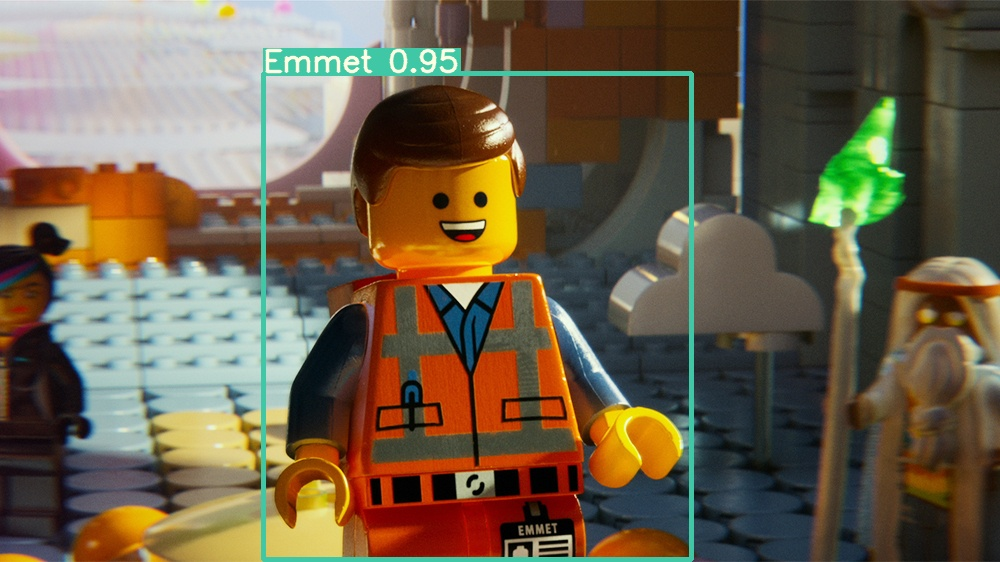

In [0]:
Image(filename='out_out/img004.jpg', width=600)

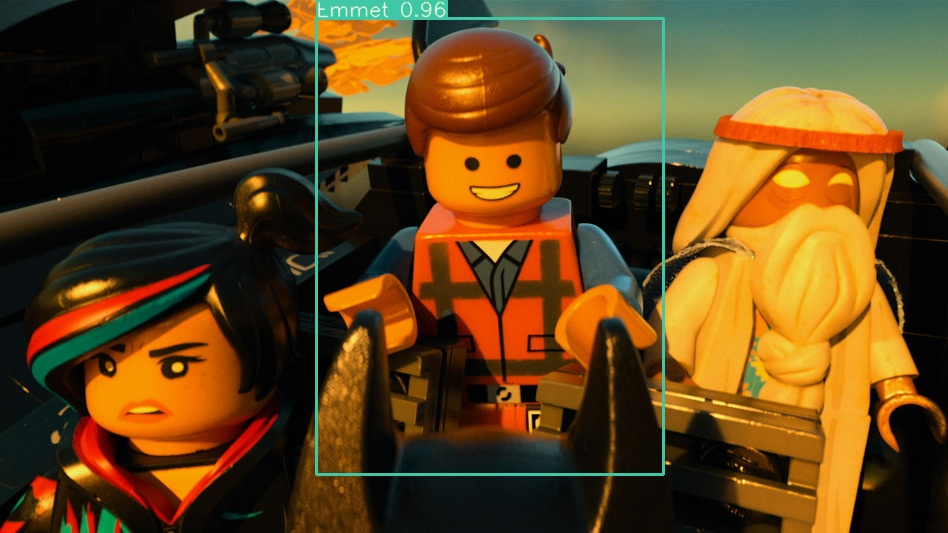

In [0]:
Image(filename='out_out/img012.jpg', width=600)

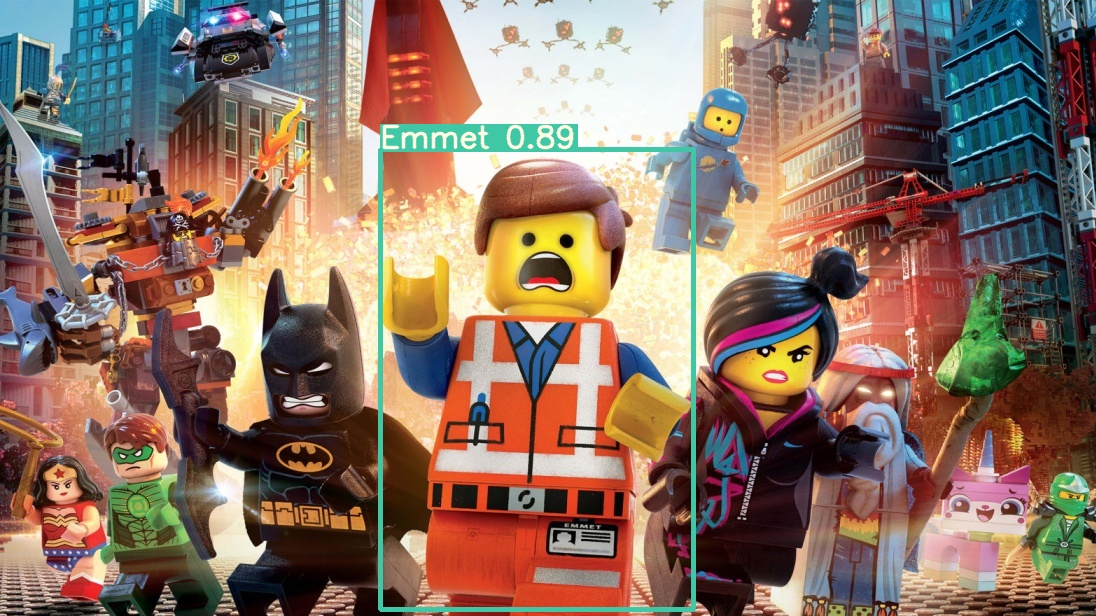

In [0]:
Image(filename='out_out/img054.jpg', width=600)

## Object Detection on video

In [0]:
!python detect.py --conf-thres 0.1 --output data/output_video --source data/input_video/lego_emmet.mp4

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='data/output_video', save_txt=False, source='data/input_video/lego_emmet.mp4', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
video 1/1 (1/3750) data/input_video/lego_emmet.mp4: 320x512 Done. (0.035s)
video 1/1 (2/3750) data/input_video/lego_emmet.mp4: 320x512 Done. (0.033s)
video 1/1 (3/3750) data/input_video/lego_emmet.mp4: 320x512 Done. (0.026s)
video 1/1 (4/3750) data/input_video/lego_emmet.mp4: 320x512 Done. (0.025s)
video 1/1 (5/3750) data/input_video/lego_emmet.mp4: 320x512 Done. (0.025s)
video 1/1 (6/3750) data/input_video/lego_emmet.mp4: 320x512 Done. (0.025s)
video 1/1 (7/3750) data/input_video/lego_emmet.mp4: 320x51

Modifications

In [0]:
!pwd

/gdrive/My Drive/Colab Notebooks/SchoolOfAI/session13_yolo_analytics/YoloV3


In [0]:
!ls

 annotation_tool   output	  runs		    'ubdivisions=1'
 cfg		   __pycache__	  test_batch0.png    utils
 data		   README.md	  test.py	     vim.exe.stackdump
 detect.py	   results.json   ting		     weights
 models.py	   results.png	  train_batch0.png
 out_out	   results.txt	  train.py


In [0]:
images_loc = './data/customdata/images/'
dirs = os.listdir(images_loc)
dirs.sort()

for dir in dirs:
    print(images_loc,dir)

./data/customdata/images/ img001.jpg
./data/customdata/images/ img002.jpg
./data/customdata/images/ img003.jpg
./data/customdata/images/ img004.jpg
./data/customdata/images/ img005.jpg
./data/customdata/images/ img006.jpg
./data/customdata/images/ img007.jpg
./data/customdata/images/ img008.jpg
./data/customdata/images/ img009.jpg
./data/customdata/images/ img010.jpg
./data/customdata/images/ img011.jpg
./data/customdata/images/ img012.jpg
./data/customdata/images/ img013.jpg
./data/customdata/images/ img014.jpg
./data/customdata/images/ img015.jpg
./data/customdata/images/ img016.jpg
./data/customdata/images/ img017.jpg
./data/customdata/images/ img018.jpg
./data/customdata/images/ img019.jpg
./data/customdata/images/ img020.jpg
./data/customdata/images/ img021.jpg
./data/customdata/images/ img022.jpg
./data/customdata/images/ img023.jpg
./data/customdata/images/ img024.jpg
./data/customdata/images/ img025.jpg
./data/customdata/images/ img026.jpg
./data/customdata/images/ img027.jpg
.